<a href="https://colab.research.google.com/github/gizdatalab/DPPD_Niger/blob/main/Niger_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()


Saving vill_predictor_var_mean.csv to vill_predictor_var_mean.csv


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('vill_predictor_var_mean.csv')
df[:3]

,system:index,ET_sum_2016-06,ET_sum_2016-07,ET_sum_2016-08,ET_sum_2016-09,ET_sum_2017-06,ET_sum_2017-07,ET_sum_2017-08,ET_sum_2017-09,ET_sum_2018-06,ET_sum_2018-07,ET_sum_2018-08,ET_sum_2018-09,ET_sum_2019-06,ET_sum_2019-07,ET_sum_2019-08,ET_sum_2019-09,ET_sum_2020-06,ET_sum_2020-07,ET_sum_2020-08,ET_sum_2020-09,SS_GROUP,Surface,Village,ev_mean_2016,ev_mean_2017,ev_mean_2018,ev_mean_2019,ev_mean_2020,ev_sum_2016,ev_sum_2017,ev_sum_2018,ev_sum_2019,ev_sum_2020,pr_mean_2016,pr_mean_2017,pr_mean_2018,pr_mean_2019,pr_mean_2020,pr_sum_2016,pr_sum_2016-06,pr_sum_2016-07,pr_sum_2016-08,pr_sum_2016-09,pr_sum_2017,pr_sum_2017-06,pr_sum_2017-07,pr_sum_2017-08,pr_sum_2017-09,pr_sum_2018,pr_sum_2018-06,pr_sum_2018-07,pr_sum_2018-08,pr_sum_2018-09,pr_sum_2019,pr_sum_2019-06,pr_sum_2019-07,pr_sum_2019-08,pr_sum_2019-09,pr_sum_2020,pr_sum_2020-06,pr_sum_2020-07,pr_sum_2020-08,pr_sum_2020-09,savimax_2016,savimax_2017,savimax_2018,savimax_2019,savimax_2020,.geo
0,0000000000000000015c,0.144996,47.053971,116.338971,66.386461,6.387355,66.590945,61.367564,61.374939,0.217311,58.539666,108.045560,173.831867,5.425798,NaN,168.713973,179.655604,4.934188,26.293548,NaN,70.074974,1,4.02469,3579,27.777277,31.523259,78.407404,44.733353,28.982087,112.969491,123.651148,229.425552,232.960484,52.384652,3.207910,3.096572,4.220376,3.133498,5.686594,391.365055,44.603920,173.076983,117.177381,56.506772,377.781749,74.511142,155.362401,100.692992,47.215213,514.885869,55.562953,172.286339,209.017800,78.018777,382.286771,55.485201,140.555694,112.070532,74.175344,693.764393,89.677704,276.937441,193.556578,133.592670,0.621082,0.562682,0.710246,0.682512,0.599127,"{""type"":""Polygon"",""coordinates"":[[[4.066436957..."
1,0000000000000000015d,0.000000,86.052819,99.687305,58.138666,7.136153,77.209442,68.444972,78.668465,0.523935,60.738923,122.523942,192.785164,4.015971,38.00000,166.842442,180.622809,4.509696,25.904002,44.0,72.300061,1,7.63108,3580,30.645388,34.201715,90.767392,48.796478,34.489905,98.054942,160.642585,222.846568,196.308545,78.403109,3.218027,3.089318,4.230373,3.132896,5.698717,392.599341,44.568248,173.268933,117.777260,56.984901,376.896762,74.431557,155.186341,100.274672,47.004191,516.105505,55.832001,172.565065,209.113642,78.594796,382.213331,55.636999,139.886774,112.025873,74.663685,695.243496,89.644945,276.763807,194.754427,134.080317,0.642015,0.563705,0.726874,0.726740,0.641721,"{""type"":""Polygon"",""coordinates"":[[[4.070650005..."
2,0000000000000000015e,0.000000,51.099327,98.775939,29.414297,5.334160,78.508533,66.226658,63.020015,0.000000,53.770021,122.606018,165.041944,3.154617,26.44266,136.973712,127.009701,3.034444,27.844890,44.0,88.313258,1,13.64560,3581,43.844527,38.701420,91.932020,38.565274,34.148193,81.989205,132.184873,209.572616,114.739143,67.608162,3.258477,3.065617,4.266692,3.128870,5.743489,397.534250,44.566286,174.047029,119.854553,59.066381,374.005291,74.323576,154.705892,98.642083,46.333740,520.536377,56.926988,173.788030,208.729649,81.091710,381.722177,56.270094,137.239592,111.617324,76.595167,700.705598,89.461983,276.143513,198.916283,136.183819,0.672961,0.604450,0.794633,0.770764,0.684041,"{""type"":""Polygon"",""coordinates"":[[[4.086438573..."


In [2]:
df.columns

Index(['system:index', 'ET_sum_2016-06', 'ET_sum_2016-07', 'ET_sum_2016-08',
       'ET_sum_2016-09', 'ET_sum_2017-06', 'ET_sum_2017-07', 'ET_sum_2017-08',
       'ET_sum_2017-09', 'ET_sum_2018-06', 'ET_sum_2018-07', 'ET_sum_2018-08',
       'ET_sum_2018-09', 'ET_sum_2019-06', 'ET_sum_2019-07', 'ET_sum_2019-08',
       'ET_sum_2019-09', 'ET_sum_2020-06', 'ET_sum_2020-07', 'ET_sum_2020-08',
       'ET_sum_2020-09', 'SS_GROUP', 'Surface', 'Village', 'ev_mean_2016',
       'ev_mean_2017', 'ev_mean_2018', 'ev_mean_2019', 'ev_mean_2020',
       'ev_sum_2016', 'ev_sum_2017', 'ev_sum_2018', 'ev_sum_2019',
       'ev_sum_2020', 'pr_mean_2016', 'pr_mean_2017', 'pr_mean_2018',
       'pr_mean_2019', 'pr_mean_2020', 'pr_sum_2016', 'pr_sum_2016-06',
       'pr_sum_2016-07', 'pr_sum_2016-08', 'pr_sum_2016-09', 'pr_sum_2017',
       'pr_sum_2017-06', 'pr_sum_2017-07', 'pr_sum_2017-08', 'pr_sum_2017-09',
       'pr_sum_2018', 'pr_sum_2018-06', 'pr_sum_2018-07', 'pr_sum_2018-08',
       'pr_sum_2018-0

In [3]:
def describe_full(df):
    #pd.options.display.float_format = '{:.2f}'.format
    dtypes_description=pd.DataFrame(dict(df.dtypes),["dtypes"])
    na_description = pd.DataFrame(dict(df.isna().sum()),["NA-s"])
    na_percent = ((pd.DataFrame(dict(df.isna().sum()),["NA%"])/len(df))*100).round(decimals=2)
    description = df.describe(include='all')
    full_description = dtypes_description.append(na_description).append(na_percent).append(description).replace(np.nan, '', regex=True)

    mask = full_description.loc["freq",:]==1
    full_description.at[["top"],mask.index[mask]]=""
    #TODO: scientific notation - could be nicer
    
    return full_description

In [4]:
describe_full(df)

,system:index,ET_sum_2016-06,ET_sum_2016-07,ET_sum_2016-08,ET_sum_2016-09,ET_sum_2017-06,ET_sum_2017-07,ET_sum_2017-08,ET_sum_2017-09,ET_sum_2018-06,ET_sum_2018-07,ET_sum_2018-08,ET_sum_2018-09,ET_sum_2019-06,ET_sum_2019-07,ET_sum_2019-08,ET_sum_2019-09,ET_sum_2020-06,ET_sum_2020-07,ET_sum_2020-08,ET_sum_2020-09,SS_GROUP,Surface,Village,ev_mean_2016,ev_mean_2017,ev_mean_2018,ev_mean_2019,ev_mean_2020,ev_sum_2016,ev_sum_2017,ev_sum_2018,ev_sum_2019,ev_sum_2020,pr_mean_2016,pr_mean_2017,pr_mean_2018,pr_mean_2019,pr_mean_2020,pr_sum_2016,pr_sum_2016-06,pr_sum_2016-07,pr_sum_2016-08,pr_sum_2016-09,pr_sum_2017,pr_sum_2017-06,pr_sum_2017-07,pr_sum_2017-08,pr_sum_2017-09,pr_sum_2018,pr_sum_2018-06,pr_sum_2018-07,pr_sum_2018-08,pr_sum_2018-09,pr_sum_2019,pr_sum_2019-06,pr_sum_2019-07,pr_sum_2019-08,pr_sum_2019-09,pr_sum_2020,pr_sum_2020-06,pr_sum_2020-07,pr_sum_2020-08,pr_sum_2020-09,savimax_2016,savimax_2017,savimax_2018,savimax_2019,savimax_2020,.geo
dtypes,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object
NA-s,0,2447,1375,1636,1612,2391,2232,1598,728,3008,1821,1214,782,2227,1740,2605,837,3281,1569,4958,1594,0,0,0,168,159,94,134,404,168,159,94,134,404,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,912,912,912,912,912,0
NA%,0,20.23,11.37,13.53,13.33,19.77,18.46,13.21,6.02,24.87,15.06,10.04,6.47,18.42,14.39,21.54,6.92,27.13,12.97,41,13.18,0,0,0,1.39,1.31,0.78,1.11,3.34,1.39,1.31,0.78,1.11,3.34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.54,7.54,7.54,7.54,7.54,0
count,12093,9646,10718,10457,10481,9702,9861,10495,11365,9085,10272,10879,11311,9866,10353,9488,11256,8812,10524,7135,10499,12093,12093,12093,11925,11934,11999,11959,11689,11925,11934,11999,11959,11689,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,12093,11181,11181,11181,11181,11181,12093
unique,12093,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,12093
top,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
freq,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,1
mean,,3.61794,26.2698,54.3067,43.9726,8.81958,34.7367,58.6158,52.7731,7.93768,28.5134,97.4027,81.2853,5.39789,16.1319,67.9115,55.6215,3.59086,25.5024,71.86,85.5611,2.9876,19.8816,6046,19.3912,21.4308,37.3378,22.8129,28.1929,79.1056,99.9479,135.205,82.7388,99.5233,3.07283,2.94091,3.70699,3.36762,4.29774,374.886,54.4971,118.984,135.612,65.7926,358.791,66.1166,123.445,133.539,35.6903,452.253,60.3437,120.462,186.349,85.0979,410.85,59.686,117.739,179.099,54.3263,524.324,48.7613,174.611,200.154,100.798,0.507607,0.567885,0.589366,0.56063,0.583292,
std,,5.96419,26.9761,45.9865,59.6627,17.4145,38.7248,50.7006,69.7409,9.38077,31.1776,60.6351,82.2809,10.8632,20.9514,46.9859,62.2484,6.72251,28.24,41.9741,79.157,1.34916,29.7316,3491.09,16.9441,17.2002,23.2438,19.0605,20.1177,108.72,147.811,156.029,113.971,121.371,0.697029,0.692005,0.868237,0.749519,1.16239,85.0375,16.9602,25.4051,36.5278,32.0546,84.4246,31.5822,25.4366,32.3707,16.5647,105.925,19.4592,33.0344,42.4375,27.6453,91.4413,19.1837,33.5393,53.6513,29.1551,141.811,28.578,45.5869,57.273,41.7663,0.142846,0.119919,0.121709,0.133144,0.118515,
min,,0,0,1,0,0,0,1,0,0,1,6,0,0,0,2.50804,0,0,0,2,1,1,0.542091,0,0,0,0,0,0,0,0,0,0,0,1.35486,1.54856,1.84234,1.60478,1.65058,165.293,19.2933,57.7518,51.1515,13.6527,188.924,10.5974,52.1824,60.924,7.94632,224.766,22.2546,48.9031,85.4

In [5]:
df['village'] = ['vil_'+str(i) for i in range(0,len(df))]

In [6]:
years = ['2016','2017','2018','2019','2020']

In [7]:
villages_list = []
year_list = []
for year in years:
    villages_list += ['vil_'+str(i) for i in range(0,len(df))]
    year_list += [ year for i in range(0,len(df))]

In [11]:
# dictionary of lists  
dict_ = {'village': villages_list, 'year': year_list}  
    
df_new = pd.DataFrame(dict_) 
df_new[:4]  

,village,year
0,vil_0,2016
1,vil_1,2016
2,vil_2,2016
3,vil_3,2016


In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [13]:
df_trans= pd.DataFrame()

for year in years:
    print(year)
    df_year = df[[col for col in df.columns if year in col]]
    df_year['year'] = [ year for i in range(0,len(df))] 
    df_year['village'] = df['village']
    df_year.columns = [col.replace(year,'').replace('-','') for col in df_year.columns]
    print(df_year.shape)
    df_new_year = df_new[df_new['year']==year].merge(df_year,on=['village','year'],how='left')
    df_new_year[df_new_year['year'].isna()==False]
    #df_new_year = df_new_year.dropna()
    print('df_new',df_new.shape,'df_new_year',df_new_year.shape)
    df_trans = df_trans.append(df_new_year)
    print('df_trans',df_trans.shape)
    print()

2016
(12093, 15)
df_new (60465, 2) df_new_year (12093, 15)
df_trans (12093, 15)

2017
(12093, 15)
df_new (60465, 2) df_new_year (12093, 15)
df_trans (24186, 15)

2018
(12093, 15)
df_new (60465, 2) df_new_year (12093, 15)
df_trans (36279, 15)

2019
(12093, 15)
df_new (60465, 2) df_new_year (12093, 15)
df_trans (48372, 15)

2020
(12093, 15)
df_new (60465, 2) df_new_year (12093, 15)
df_trans (60465, 15)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [14]:
df_trans['year'].value_counts()

2018    12093
2019    12093
2016    12093
2020    12093
2017    12093
Name: year, dtype: int64

In [15]:
df_trans

,village,year,ET_sum_06,ET_sum_07,ET_sum_08,ET_sum_09,ev_mean_,ev_sum_,pr_mean_,pr_sum_,pr_sum_06,pr_sum_07,pr_sum_08,pr_sum_09,savimax_
0,vil_0,2016,0.144996,47.053971,116.338971,66.386461,27.777277,112.969491,3.207910,391.365055,44.603920,173.076983,117.177381,56.506772,0.621082
1,vil_1,2016,0.000000,86.052819,99.687305,58.138666,30.645388,98.054942,3.218027,392.599341,44.568248,173.268933,117.777260,56.984901,0.642015
2,vil_2,2016,0.000000,51.099327,98.775939,29.414297,43.844527,81.989205,3.258477,397.534250,44.566286,174.047029,119.854553,59.066381,0.672961
3,vil_3,2016,0.000000,59.971809,121.022846,67.677314,39.527290,189.980457,3.260365,397.764568,45.043310,173.066369,116.971398,62.683492,0.647012
4,vil_4,2016,0.000000,57.249273,65.178761,18.036867,21.202513,64.582282,3.221168,392.982451,41.646240,169.680403,118.454607,63.201201,0.594026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12088,vil_12088,2020,1.645154,17.765186,134.213747,72.389693,20.272131,193.964699,4.128512,503.678402,34.791246,161.608475,225.887227,81.391453,0.577904
12089,vil_12089,2020,1.205473,10.823640,100.684942,72.317882,15.528628,158.159507,3.985364,486.214442,31.270232,156.191505,216.654131,82.098574,0.500590
12090,vil_12090,2020,1.003225,5.879359,76.060300,70.679422,27.003858,82.310823,3.299984,402.598059,37.911342,136.667396,165.100685,62.918636,0.646426
12091,vil_12091,2020,0.124231,72.380338,100.397239,106.868123,43.194790,113.925338,3.559830,434.299283,34.814893,137.994747,194.145807,67.343836,0.608112


In [16]:
describe_full(df_trans)

,village,year,ET_sum_06,ET_sum_07,ET_sum_08,ET_sum_09,ev_mean_,ev_sum_,pr_mean_,pr_sum_,pr_sum_06,pr_sum_07,pr_sum_08,pr_sum_09,savimax_
dtypes,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
NA-s,0,0,13354,8737,12011,5553,959,959,0,0,0,0,0,0,4560
NA%,0,0,22.09,14.45,19.86,9.18,1.59,1.59,0,0,0,0,0,0,7.54
count,60465,60465,47111,51728,48454,54912,59506,59506,60465,60465,60465,60465,60465,60465,55905
unique,12093,5,,,,,,,,,,,,,
top,vil_2909,2018,,,,,,,,,,,,,
freq,5,12093,,,,,,,,,,,,,
mean,,,5.88988,26.1442,70.1648,63.8193,25.8357,99.3386,3.47722,424.221,57.8809,131.048,166.951,68.341,0.561756
std,,,11.1596,30.2499,52.7383,73.075,20.4968,132.512,0.981883,119.79,24.5766,39.9418,53.0395,38.1144,0.130815
min,,,0,0,1,0,0,0,1.35486,165.293,1.69915,48.9031,51.1515,7.94632,0.120148


In [18]:
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

### Mean Evapotranspiration 

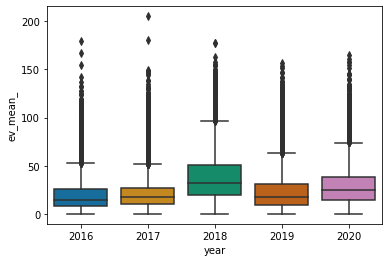

In [20]:
sns.boxplot(y='ev_mean_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


### Mean Precipitation

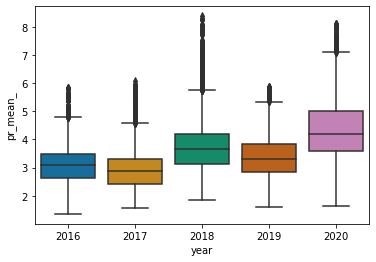

In [21]:
sns.boxplot(y='pr_mean_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


# Max Savi

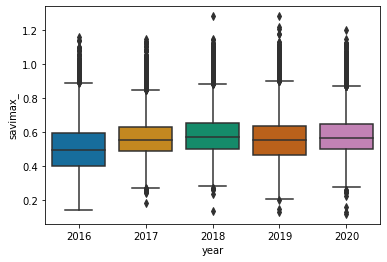

In [22]:
sns.boxplot(y='savimax_', x='year', 
                 data=df_trans, 
                 palette="colorblind")
                 #hue='year')


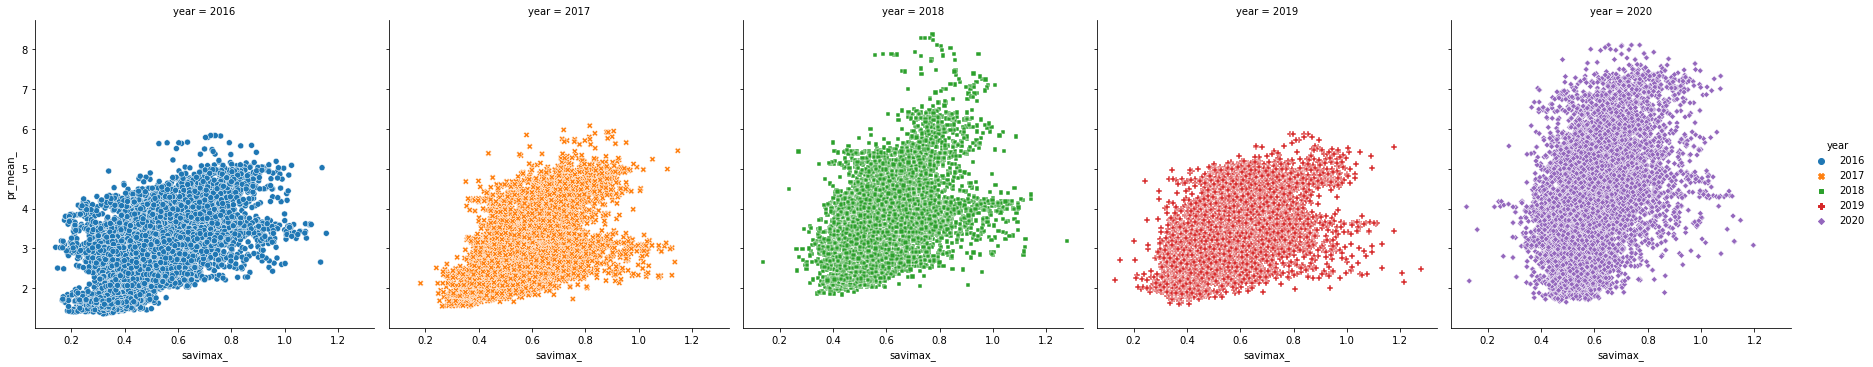

In [39]:
sns.relplot(
    data=df_trans, x="savimax_", y="pr_mean_",
    col="year", hue="year", style="year",
    kind="scatter"
)

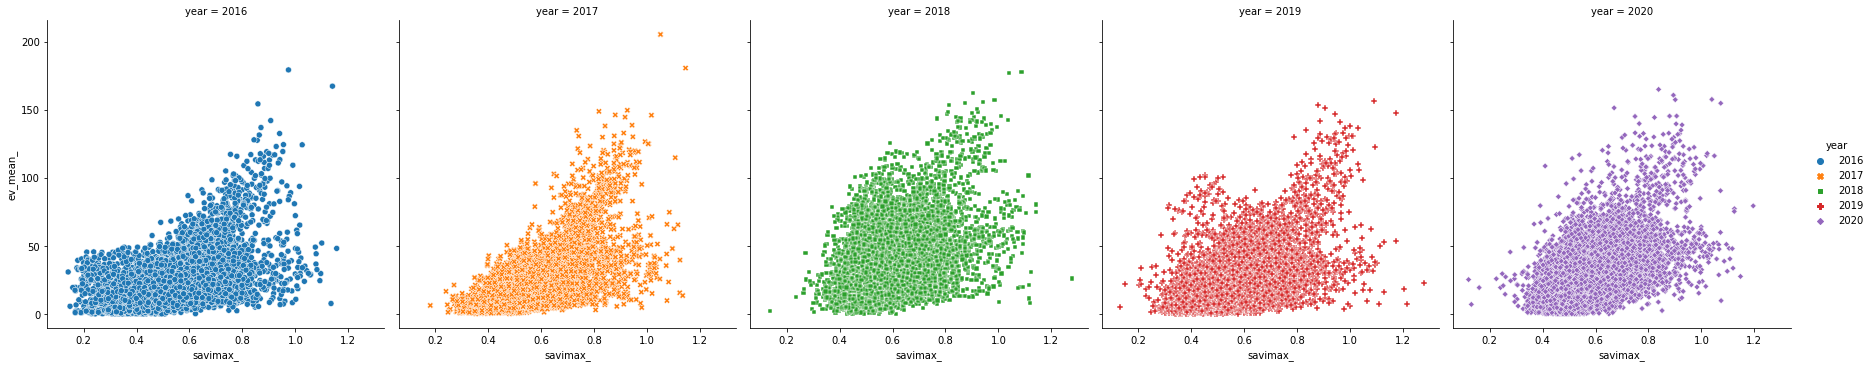

In [40]:
sns.relplot(
    data=df_trans, x="savimax_", y="ev_mean_",
    col="year", hue="year", style="year",
    kind="scatter"
)

In [24]:
df_trans[['savimax_','pr_mean_','ev_mean_']].corr()

,savimax_,pr_mean_,ev_mean_
savimax_,1.000000,0.461101,0.540367
pr_mean_,0.461101,1.000000,0.576427
ev_mean_,0.540367,0.576427,1.000000


## Clustering

In [26]:
# for clustering:
from sklearn.cluster import KMeans
 

In [30]:
df_trans[df_trans['ev_mean_'].isna()==True].village.value_counts()

vil_9714    5
vil_7767    5
vil_8488    5
vil_4999    5
vil_5000    5
           ..
vil_6080    1
vil_8402    1
vil_5624    1
vil_9543    1
vil_4955    1
Name: village, Length: 631, dtype: int64

0

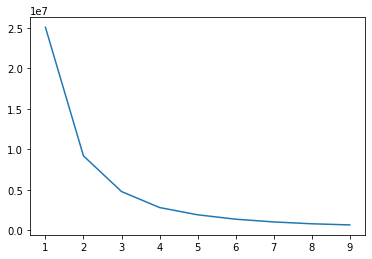

In [47]:
df_trans = df_trans[df_trans['ev_mean_'].isna()==False]
clust_df = df_trans[['pr_mean_', 'ev_mean_']].copy()
#clust_df = clust_df[clust_df['ev_mean_'].isna()==False]
max_k=10
wcss=[]

for k in range(1,max_k):
  kmeans = KMeans(k)
  kmeans.fit(clust_df)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_of_clusters = range(1,max_k)
plt.plot(number_of_clusters,wcss)

        A 2-cluster solution would look like this:


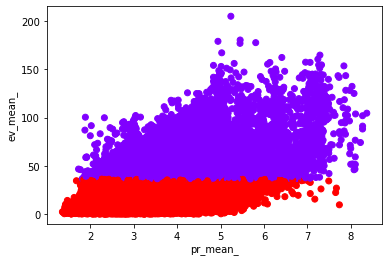

        A 3-cluster solution would look like this:


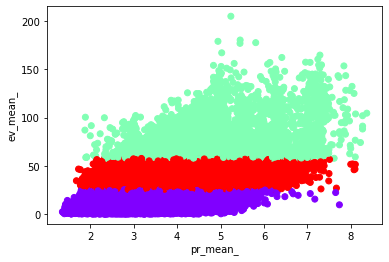

        A 4-cluster solution would look like this:


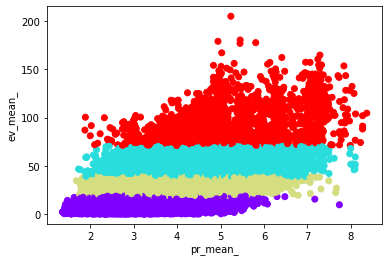

In [34]:

for k in range(2,5):
   kmeans = KMeans(k)
   identified_clusters = kmeans.fit_predict(clust_df)
   print('        A ' + str(k) +'-cluster solution would look like this:')
   plt.scatter(clust_df['pr_mean_'],clust_df['ev_mean_'],
               c=identified_clusters,cmap='rainbow')
   plt.xlabel('pr_mean_')
   plt.ylabel('ev_mean_')
   plt.show()

## Regression

In [41]:
#for scaling/PCA:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
 
 #regression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [42]:
def scale_regress(X,Y,vars,deviant=False):
    #trian test split
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    #scale the data - Standardize features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_scaled = pd.DataFrame(scaler.transform(X_train), columns = vars)
    X_scaled.index = y_train.index
    # adding a constant
    X_scaled = sm.add_constant(X_scaled) 

    model = sm.OLS(y_train, X_scaled).fit()

    print_model = model.summary()
    print(print_model)

    X_scaled_test = pd.DataFrame(scaler.transform(X_test), columns = vars)
    X_scaled_test.index = y_test.index
    X_scaled_test = sm.add_constant(X_scaled_test)
    predictions_train = model.predict(X_scaled) 
    predictions_test = model.predict(X_scaled_test) 
    print('train MSE',round(mean_squared_error(y_train, predictions_train),3))
    print('test MSE',round(mean_squared_error(y_test, predictions_test),3))

In [44]:
df_trans.columns

Index(['village', 'year', 'ET_sum_06', 'ET_sum_07', 'ET_sum_08', 'ET_sum_09',
       'ev_mean_', 'ev_sum_', 'pr_mean_', 'pr_sum_', 'pr_sum_06', 'pr_sum_07',
       'pr_sum_08', 'pr_sum_09', 'savimax_'],
      dtype='object')

In [54]:
df_trans = df_trans[df_trans['savimax_'].isna()==False]

In [85]:
bund0 = ['ev_sum_', 'pr_sum_']
bund1 = ['year', 'ev_sum_', 'pr_sum_']
bund2 = ['year', 'ev_mean_', 'pr_mean_']
bund3 = ['year', 'ET_sum_06', 'ET_sum_07','ET_sum_08', 'ET_sum_09','pr_sum_06', 'pr_sum_07','pr_sum_08', 'pr_sum_09']


X = df_trans[bund0]
Y = df_trans['savimax_']

scale_regress(X,Y,bund0)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 2.225e+04
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:23:30   Log-Likelihood:                 46483.
No. Observations:               49543   AIC:                        -9.296e+04
Df Residuals:                   49540   BIC:                        -9.293e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5638      0.000   1325.399      0.0

In [82]:
bund0 = ['ev_mean_', 'pr_mean_']
bund1 = ['year', 'ev_sum_', 'pr_sum_']
bund2 = ['year', 'ev_mean_', 'pr_mean_']
bund3 = ['ET_sum_06', 'ET_sum_07','ET_sum_08', 'ET_sum_09','pr_sum_06', 'pr_sum_07','pr_sum_08', 'pr_sum_09']


X = df_trans[bund3].dropna()
Y = df_trans.dropna()['savimax_']

scale_regress(X,Y,bund3)

                            OLS Regression Results                            
Dep. Variable:               savimax_   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     3505.
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        17:23:15   Log-Likelihood:                 26514.
No. Observations:               29736   AIC:                        -5.301e+04
Df Residuals:                   29727   BIC:                        -5.294e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5953      0.001   1034.684      0.0

In [72]:
import xgboost

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [87]:
import xgboost
dtrain = xgboost.DMatrix(X_train,y_train)
dtest = xgboost.DMatrix(X_test,y_test)
model = xgboost.XGBRegressor(colsample_bytree=.8,reg_alpha=.5,reg_lambda=.1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print('train',mean_squared_error(y_train, y_pred))

y_pred = model.predict(X_test)
print('test',mean_squared_error(y_test, y_pred))

[17:23:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train 0.00762260030382496
test 0.007743620741779881


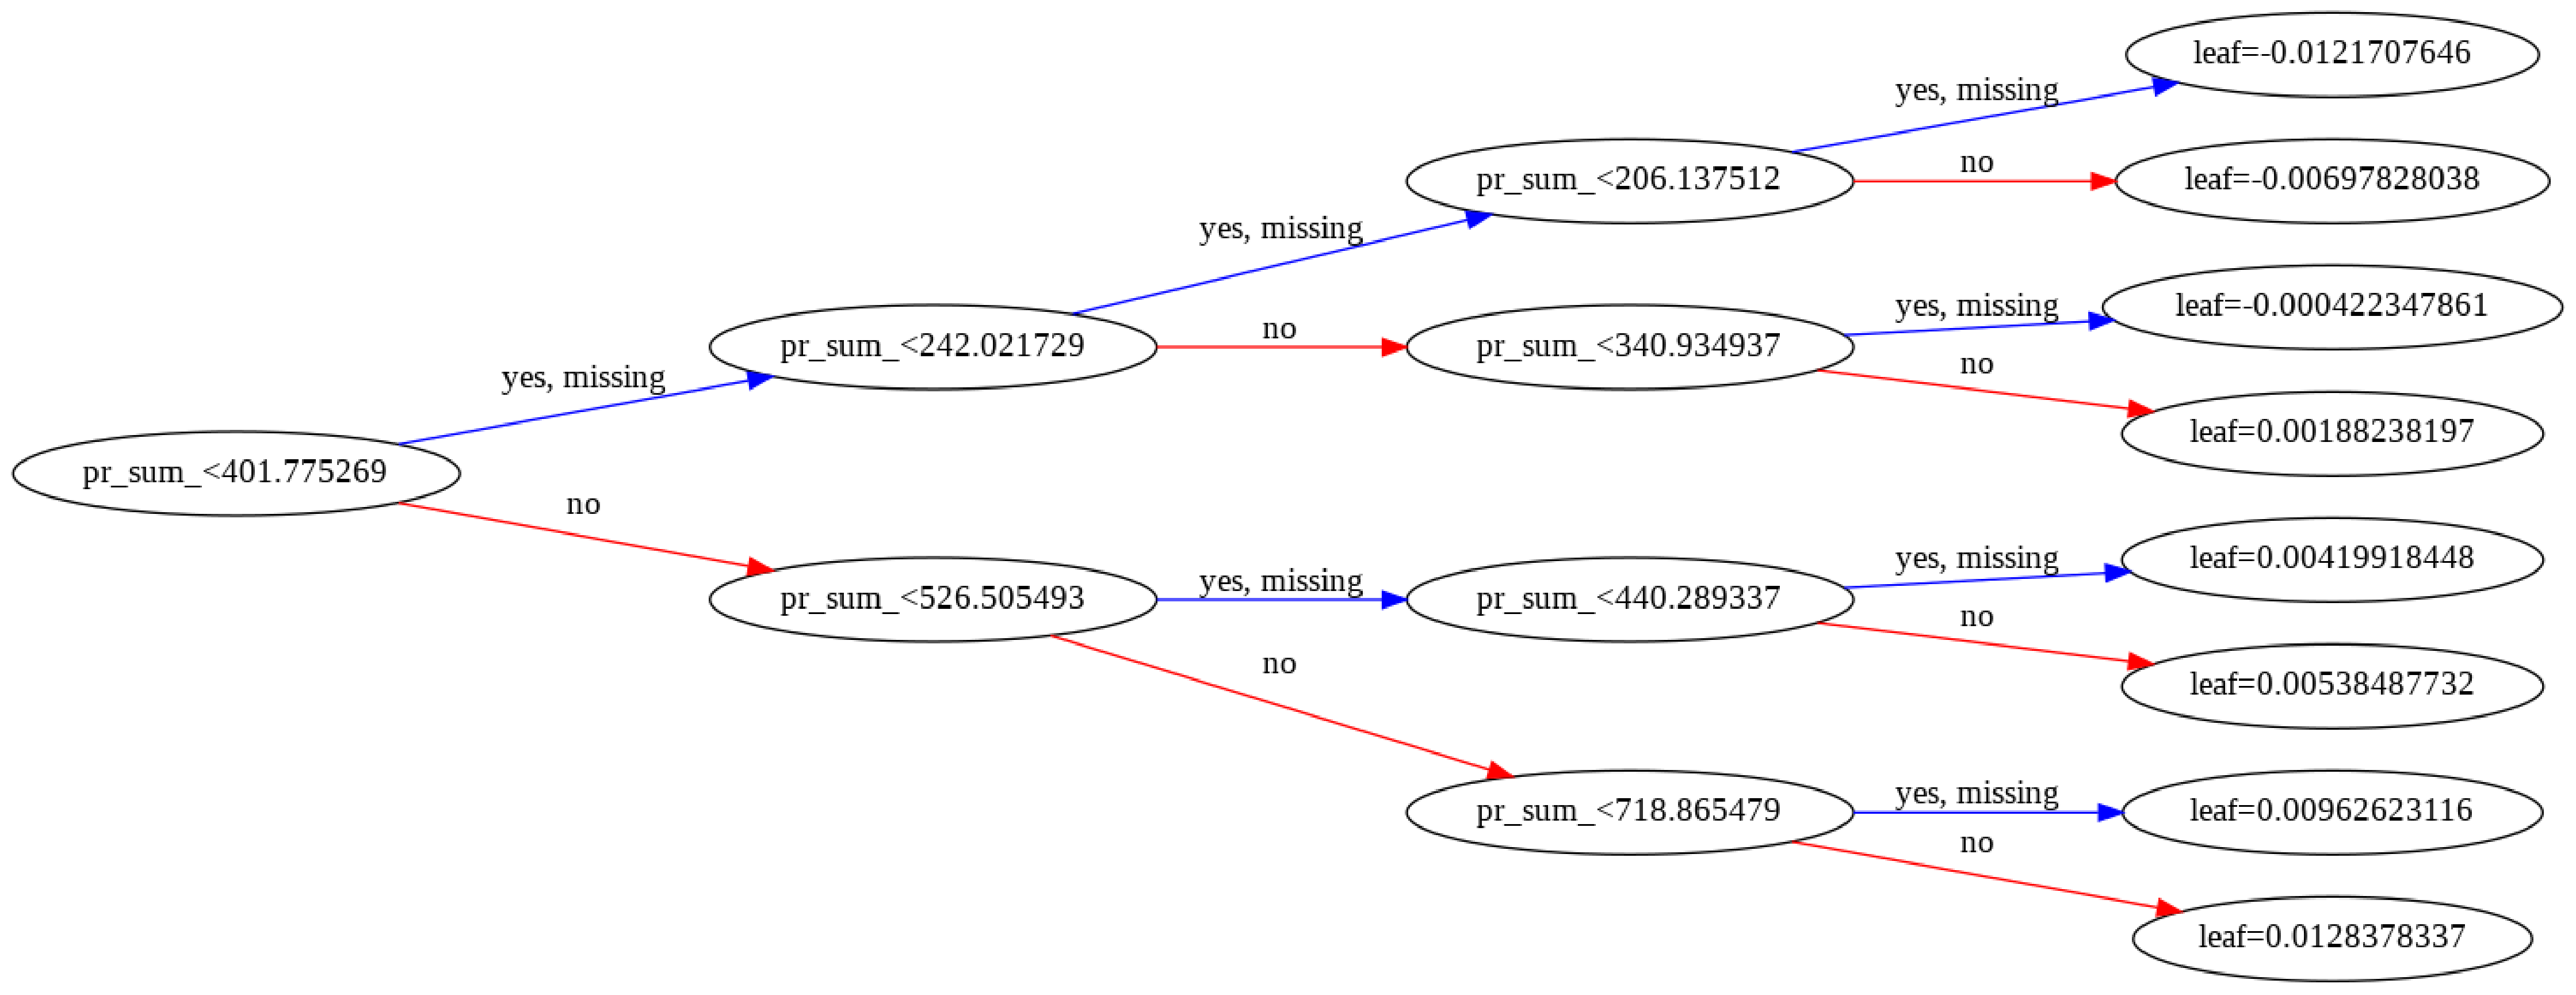

In [88]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 80,50
xgboost.plot_tree(model, num_trees=5, rankdir='LR')

plt.show()